In [1]:
import numpy as np
import numpy.linalg as linalg
import sys

from math import sqrt
from mltools import kmeans
from mltools import aggfuncs
from mltools import funcs

In [2]:
# def dist2(x):
#     return (x @ x)

# def mdist2(x, S1):
#     return (S1 @ x) @ x

# class KMeansMahalanobis:
#     #
#     def __init__(self, q, tol=1.0e-9, n_iter=500):
#         self.q = q
#         self.n_iter = n_iter
#         self.tol = tol
#     #
#     def dist(self, x):
#         S1 = self.S1
#         c = self.c
#         ds = [mdist2(x - c[j], S1[j]) for j in range(self.q)]
#         d_min = min(ds)
#         return sqrt(d_min)
#     #
#     def find_clusters(self, X):
#         q = self.q
#         I = [[] for j in range(q)]
#         S1 = self.S1
#         c = self.c
#         for k, xk in enumerate(X):
#             ds = [mdist2(xk - c[j], S1[j]) for j in range(q)]
#             d_min = min(ds)
#             for j in range(q):
#                 if ds[j] == d_min:
#                     I[j].append(k)
#         return I
#     #
#     def find_centers(self, X, I):
#         n = X.shape[1]
#         c = np.zeros((self.q, n), 'd')
#         for j in range(self.q):
#             Ij = I[j]
#             cj = sum((X[k] for k in Ij), start=np.zeros(n, 'd'))
#             cj /= len(Ij)
#             c[j,:] = cj
#         return c
#     #
#     def initial_centers(self, X):
#         N, n = X.shape
#         q = self.q
        
#         xmin = np.fromiter((min(X[:,i]) for i in range(n)), 'd', n)
#         xmax = np.fromiter((max(X[:,i]) for i in range(n)), 'd', n)
#         c = np.random.random(size=(q, n))
#         return xmin + c * (xmax - xmin)
#     #
#     def find_covs(self, X, I):
#         n = X.shape[1]
#         S1 = []
#         n1 = 1.0/n
#         for j in range(self.q):
#             Sj = np.zeros((n,n), 'd')
#             Ij = I[j]
#             cj = self.c[j]
#             for k in Ij:
#                 v = X[k] - cj
#                 Sj += np.outer(v, v)
#             Sj /= len(Ij)
#             Sj = linalg.inv(Sj)
#             Sj /= linalg.det(Sj) ** n1
#             S1.append(Sj)
#         return S1
#     #
#     def stop_condition(self, c, c_prev):
#         d_max = max(dist2(c[j]-c_prev[j]) for j in range(self.q))
#         d_max = sqrt(d_max)
#         print(d_max)
#         if d_max < self.tol:
#             return True
        
#         return False
#     #
#     def fit(self, X):
#         q = self.q
#         n = X.shape[1]
#         self.c = self.initial_centers(X)
#         self.S1 = [np.identity(n) for j in range(q)]
#         for K in range(self.n_iter):
#             c_prev = self.c.copy()
#             self.I = I = self.find_clusters(X)
#             self.c = self.find_centers(X, I)
#             self.S1 = self.find_covs(X, I)
#             if self.stop_condition(self.c, c_prev):
#                 break
#         self.K = K + 1

In [3]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [4]:
X_iris, Y_iris = datasets.load_iris(return_X_y=True)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
pca.fit(X_iris)
X = pca.transform(X_iris)
Y = Y_iris

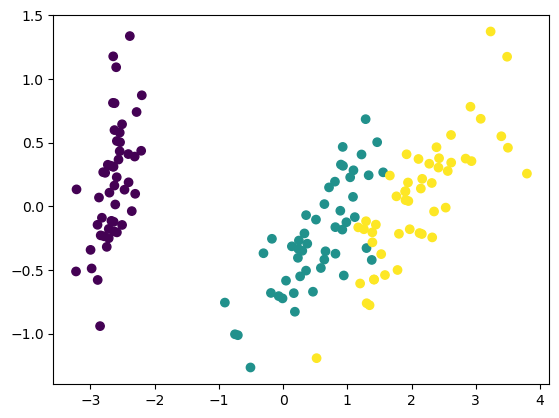

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [8]:
XX, YY = np.meshgrid(np.linspace(-4,4,100), np.linspace(-4,4,100))
XY = np.c_[(XX.ravel(), YY.ravel())]

In [9]:
kmm = kmeans.KMeansMahalanobis(3)

In [10]:
kmm.fit(X)

In [11]:
print(kmm.K)
print(kmm.c)

4
[[-2.64241546  0.19088505]
 [ 2.07527043  0.0308912 ]
 [ 0.50430647 -0.23230406]]


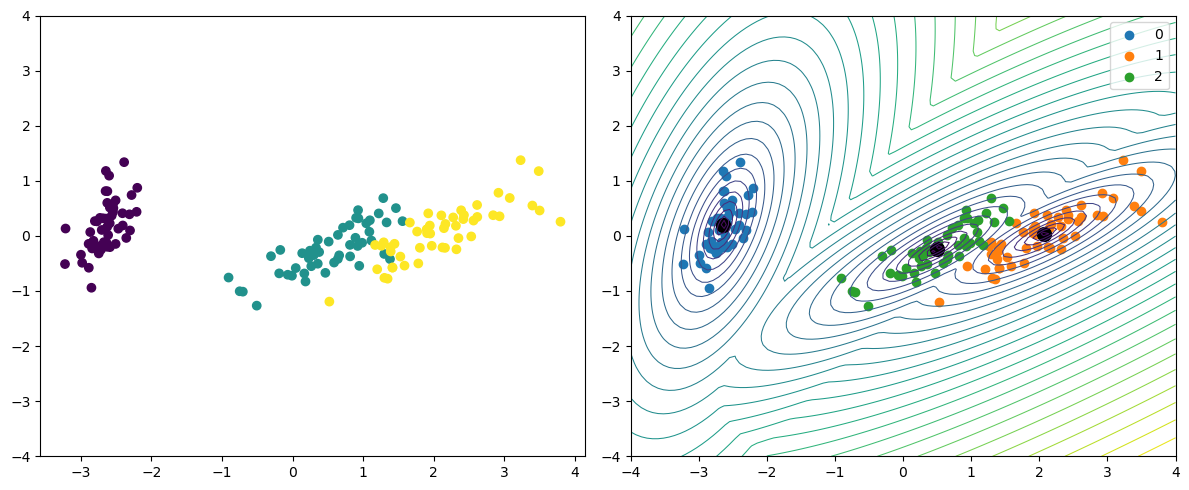

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.ylim(-4,4)
plt.subplot(1,2,2)
for j, Ij in enumerate(kmm.Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(kmm.c[:,0], kmm.c[:,1], c='k', s=100)

Z = np.fromiter((sqrt(kmm.dist(xy)) for xy in XY), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(-4,4,-4,4), linewidths=0.75)

plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# class RKMeansMahalanobis:
#     #
#     def __init__(self, q, avrfunc=None, tol=1.0e-9, n_iter=500):
#         self.q = q
#         self.n_iter = n_iter
#         self.tol = tol
#         if avrfunc is None:
#             self.avrfunc = pyinv.ArithMean()
#         else:
#             self.avrfunc = avrfunc
#     #
#     def dist2(self, x):
#         S1 = self.S1
#         c = self.c
#         return min((mdist2(x - c[j], S1[j]) for j in range(self.q)))
#     #
#     def find_clusters(self, X):
#         q = self.q
#         I = [[] for j in range(q)]
#         S1 = self.S1
#         c = self.c
#         for k, xk in enumerate(X):
#             ds = [mdist2(xk - c[j], S1[j]) for j in range(q)]
#             d_min = min(ds)
#             for j in range(q):
#                 if ds[j] == d_min:
#                     I[j].append(k)
#         return I
#     #
#     def find_centers(self, X, I, G):
#         n = X.shape[1]
#         c = np.zeros((self.q, n), 'd')
#         for j in range(self.q):
#             Ij = I[j]
#             cj = sum((G[k] * X[k] for k in Ij), start=np.zeros(n, 'd'))
#             GG = sum(G[k] for k in Ij)
#             c[j,:] = cj / GG
#         return c
#     #
#     def initial_centers(self, X):
#         N, n = X.shape
#         q = self.q
        
#         xmin = np.fromiter((min(X[:,i]) for i in range(n)), 'd', n)
#         xmax = np.fromiter((max(X[:,i]) for i in range(n)), 'd', n)
#         c = np.random.random(size=(q, n))
#         return xmin + c * (xmax - xmin)
#     #
#     def find_covs(self, X, I, G):
#         n = X.shape[1]
#         S1 = []
#         n1 = 1.0/n
#         for j in range(self.q):
#             Sj = np.zeros((n,n), 'd')
#             Ij = I[j]
#             cj = self.c[j]
#             g = 0
#             for k in Ij:
#                 v = X[k] - cj
#                 Sj += G[k] * np.outer(v, v)
#                 g += G[k]
#             Sj /= g
#             Sj = linalg.pinv(Sj)
#             Sj /= linalg.det(Sj) ** n1
#             S1.append(Sj)
#         return S1
#     #
#     def stop_condition(self, c, c_prev):
#         d_max = max(dist2(c[j]-c_prev[j]) for j in range(self.q))
#         d_max = sqrt(d_max)
#         print(d_max)
#         if d_max < self.tol:
#             return True
        
#         return False
#     #
#     def fit(self, X):
#         q = self.q
#         n = X.shape[1]
#         N = X.shape[0]
#         self.c = self.initial_centers(X)
#         self.S1 = [np.identity(n) for j in range(q)]
#         for K in range(self.n_iter):
#             c_prev = self.c.copy()
#             self.ds = np.fromiter((self.dist2(x) for x in X), 'd', N)
#             dd = self.avrfunc.evaluate(self.ds)
#             G = self.avrfunc.gradient(self.ds)
#             self.I = self.find_clusters(X)
#             self.c = self.find_centers(X, self.I, G)
#             self.S1 = self.find_covs(X, self.I, G)
#             if self.stop_condition(self.c, c_prev):
#                 break
#         self.K = K + 1

In [14]:
rhofunc = funcs.SoftQuantileFunc(funcs.SoftAbs(0.001), 0.96)
avrfunc = aggfuncs.CMMean(rhofunc)
kmm_rob = kmeans.RKMeansMahalanobis(3, avrfunc, tol=1.0e-6)

In [15]:
kmm_rob.fit(X)

In [16]:
print(kmm_rob.K)
print(kmm_rob.c)
print(kmm_rob.S1)

3
[[ 0.30848635 -0.30364349]
 [ 1.93145425 -0.01910524]
 [-2.64241637  0.19088496]]
[array([[ 1.24979098, -1.30029281],
       [-1.30029281,  2.15296911]]), array([[ 0.87954107, -0.88930089],
       [-0.88930089,  2.03612558]]), array([[ 2.50854605, -0.64578521],
       [-0.64578521,  0.5648844 ]])]


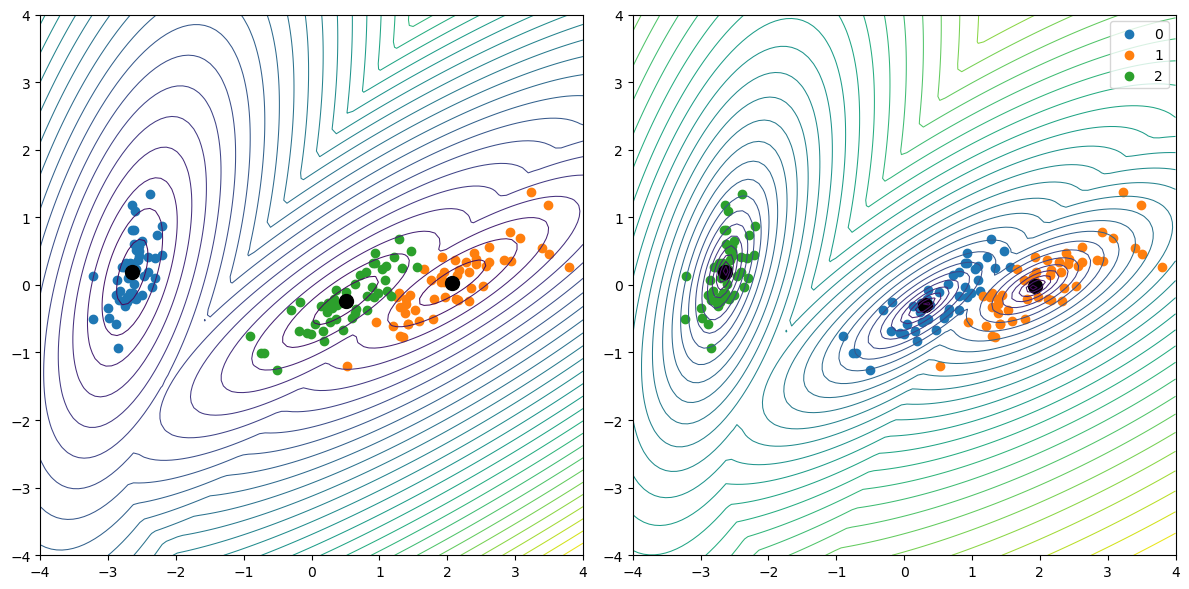

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for j, Ij in enumerate(kmm.Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(kmm.c[:,0], kmm.c[:,1], c='k', s=100)

Z = np.fromiter(kmm.eval_dists(XY), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(-4,4,-4,4), linewidths=0.75)

plt.subplot(1,2,2)
for j, Ij in enumerate(kmm_rob.Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(kmm_rob.c[:,0], kmm_rob.c[:,1], c='k', s=100)

Z = np.fromiter(np.sqrt(kmm_rob.eval_dists(XY)), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(-4,4,-4,4), linewidths=0.75)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
S = np.array([[1,0,0],[1,2,1],[0,0,1]], 'd')
# print(S)
#print(linalg.det(S))
x = np.array([1,2,3], 'd')
# print(np.dot(x, S))
# print(np.dot(S, x))
np.dot(np.dot(S, x), x)

In [ ]:
np.outer(x, x)

In [ ]:
mdist2(x, S)

In [ ]:
print(0, kmm.I[0])
print(1, kmm.I[1])
print(2, kmm.I[2])